<a href="https://colab.research.google.com/github/bishram-acharya/hitachi_solution/blob/main/hitachi_solution_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⚡ Hitachi Technergy: Energy Forecasting
In this notebook, we're going to predict the demand and price of energy for 7 days.

## 1. Problem Statement :
- Predict the demand of energy given its weather/environment data
- Predict the price of energy give past date data(hourly)

## 2. Data :
The data has been provided by Hitachi energy itself. There are three main datasets :
- Demand Forecasting Demand Data upto Feb 21.csv, which provides the hourly demand in MW.
- Demand Forecasting Weather Data upto Feb 28.csv, which provides hourly values of input features(independent variables).
- Price Forecasting data upto December 24.csv, which provides hourly values of energy prices

## 3. Features :
- Temperature: Represents the air temperature at a specific location in degree Farhenheit.

- Feels Like: Describes the perceived temperature by factoring in wind and humidity.

- Dewpoint: Indicates the temperature at which air becomes saturated, leading to dew formation.

- Humidity: Measures the amount of water vapor in the air, expressed as a percentage.

- Precipitation: Quantifies the amount of rain or snowfall in a specific period, measured in millimeters.

- Precipitation Probability: Represents the likelihood of precipitation occurring, expressed as a percentage.

- Precipitation Type: Identifies the type of precipitation, such as rain, snow, sleet, etc.

- Snowfall: Measures the amount of snowfall in a specific period, measured in millimeters.

- Snow Depth: Indicates the depth of accumulated snow on the ground, measured in centimeters.

- Wind Gust: Represents the maximum wind speed observed during a specific period, measured in meters per second.

- Wind Speed: Describes the average wind speed at a specific location, measured in meters per second.

- Wind Direction: Indicates the direction from which the wind is blowing, measured in degrees.

- Sea Level Pressure: Represents the atmospheric pressure at sea level, measured in hectopascals (hPa).

- Cloud Cover: Describes the fraction of the sky covered by clouds, expressed as a percentage.

- Visibility: Indicates the distance at which objects can be clearly seen, measured in kilometers.

- Solar Radiation: Represents the amount of solar energy received per unit area, measured in watts per square meter (W/m^2).

- UV Index: Measures the strength of ultraviolet (UV) radiation.

- Severe Risk: Represents the level of risk associated natural calamities.

- Conditions: Describes the overall weather conditions at a specific location.

## 4. Expected Output:
**7 days forecast given the input features for demand(MW) and prices(EUR/MWh) given its historical data**






### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

## Exploratory Data Analysis

### Reading Data and Basic Insights

In [2]:
# Importing Data with weather features
# variable df will hold feature csv file
# variable df_demand will hold demand(MW) values csv

df_weather=pd.read_csv('https://raw.githubusercontent.com/bishram-acharya/hitachi_solution/main/Demand%20Forecasting%20Weather%20Data%20upto%20Feb%2028.csv')
df_demand=pd.read_csv("https://raw.githubusercontent.com/bishram-acharya/hitachi_solution/main/Demand%20Forecasting%20Demand%20Data%20upto%20Feb%2021.csv")

In [3]:
# Getting a look at what we are working with ...
df_weather.head()

,Name,datetime,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,snow,...,visibility,solarradiation,uvindex,severerisk,conditions,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Pokhara,1/1/2020 0:00,38.0,34.4,29.0,69.76,0.0,0,NaN,0.0,...,9.9,0.0,0,NaN,Overcast,NaN,NaN,NaN,NaN,NaN
1,Pokhara,1/1/2020 1:00,38.0,34.4,29.9,72.37,0.0,0,NaN,0.0,...,9.9,0.0,0,NaN,Overcast,NaN,NaN,NaN,NaN,NaN
2,Pokhara,1/1/2020 2:00,38.0,35.7,30.8,75.06,0.0,0,NaN,0.0,...,9.9,0.0,0,NaN,Overcast,NaN,NaN,NaN,NaN,NaN
3,Pokhara,1/1/2020 3:00,37.1,33.4,29.9,74.97,0.0,0,NaN,0.0,...,9.9,0.0,0,NaN,Partially cloudy,NaN,NaN,NaN,NaN,NaN
4,Pokhara,1/1/2020 4:00,35.1,32.3,29.0,78.41,0.0,0,NaN,0.0,...,9.9,0.0,0,NaN,Clear,NaN,NaN,NaN,NaN,NaN


In [4]:
# It seems that there are some unnecessary headerless columns. Dropping headerless columns that came with data:
df_weather.drop(columns=['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], inplace=True)

In [5]:
# Getting a look at datatype and count of feature columns
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27720 entries, 0 to 27719
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              27720 non-null  object 
 1   datetime          27720 non-null  object 
 2   Temperature       27720 non-null  float64
 3   feelslike         27720 non-null  float64
 4   dewpoint          27720 non-null  float64
 5   humidity          27720 non-null  float64
 6   precipitation     27720 non-null  float64
 7   precipprob        27720 non-null  int64  
 8   preciptype        2751 non-null   object 
 9   snow              27702 non-null  float64
 10  snowdepth         27702 non-null  float64
 11  windgust          12223 non-null  float64
 12  windspeed         27720 non-null  float64
 13  winddirection     27720 non-null  float64
 14  sealevelpressure  27702 non-null  float64
 15  cloudcover        27720 non-null  float64
 16  visibility        27702 non-null  float6

In [6]:
df_weather.head()

,Name,datetime,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,snow,...,windgust,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions
0,Pokhara,1/1/2020 0:00,38.0,34.4,29.0,69.76,0.0,0,NaN,0.0,...,NaN,4.7,220.0,1015.4,100.0,9.9,0.0,0,NaN,Overcast
1,Pokhara,1/1/2020 1:00,38.0,34.4,29.9,72.37,0.0,0,NaN,0.0,...,NaN,4.7,230.0,1015.3,100.0,9.9,0.0,0,NaN,Overcast
2,Pokhara,1/1/2020 2:00,38.0,35.7,30.8,75.06,0.0,0,NaN,0.0,...,NaN,3.4,230.0,1015.4,100.0,9.9,0.0,0,NaN,Overcast
3,Pokhara,1/1/2020 3:00,37.1,33.4,29.9,74.97,0.0,0,NaN,0.0,...,NaN,4.7,220.0,1015.3,88.9,9.9,0.0,0,NaN,Partially cloudy
4,Pokhara,1/1/2020 4:00,35.1,32.3,29.0,78.41,0.0,0,NaN,0.0,...,NaN,3.4,240.0,1015.2,0.0,9.9,0.0,0,NaN,Clear


In [213]:
# Finding out the count of null values in each feature columns

df_weather.isna().sum()

Name                    0
Temperature             0
feelslike               0
dewpoint                0
humidity                0
precipitation           0
precipprob              0
preciptype          24969
snow                   18
snowdepth              18
windgust            15497
windspeed               0
winddirection           0
sealevelpressure       18
cloudcover              0
visibility             18
solarradiation          0
uvindex                 0
severerisk          17766
conditions              0
Demand(MW)            168
dtype: int64

In [216]:
# Initialize an empty list to store columns with dtype 'float64'
float64_columns = []

# Iterate over columns and check dtype
for label, content in df_weather.items():
    if content.dtype == 'float64':
        float64_columns.append(label)

In [224]:
y_axis_outliers = []
# Define a z-score threshold of 3 for considering values as outliers
def outlier_count():
    for item in float64_columns:
        z_scores = np.abs(stats.zscore(df_weather[item]))
        threshold = 3
        outliers = df_weather[item][np.abs(z_scores) > threshold]
        count = outliers.count()

        y_axis_outliers.append(count)

        print(f'{item}:{count}')

outlier_count()

Temperature:14
feelslike:41
dewpoint:12
humidity:0
precipitation:295
snow:0
snowdepth:0
windgust:0
windspeed:217
winddirection:0
sealevelpressure:0
cloudcover:0
visibility:0
solarradiation:419
severerisk:0
Demand(MW):0


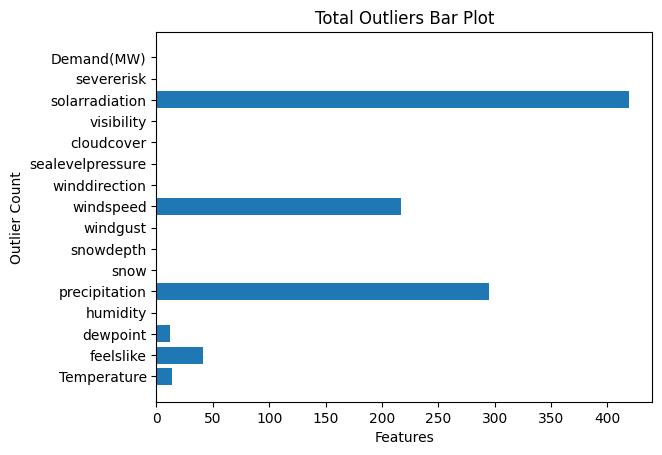

In [225]:
# plotting outliers count

plt.barh(float64_columns, y_axis_outliers)
plt.xlabel('Features')
plt.ylabel('Outlier Count')
plt.title('Total Outliers Bar Plot')


plt.show()

#### It seems that two features have lot of outliers. We will be dealing with them later in the workflow

### Parsing Date and time
When we work with time series data, we want to enrich the time & date component as much as possible. We can do that by telling pandas which of our columns has dates in it using the parse_dates parameter.

In [54]:
df_weather['datetime']=pd.to_datetime(df_weather['datetime'])
df_demand['datetime']=pd.to_datetime(df_demand['datetime'])

In [55]:
print(df_weather['datetime'].dtype)

datetime64[ns]


#### Now the datetime column is of data type datetime64

### Summary Statistics
#### Get a summary of values of each input feature

In [56]:
df_weather.describe()

,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,snow,snowdepth,windgust,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk
count,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27702.000000,27702.000000,12223.000000,27720.000000,27720.000000,27702.000000,27720.000000,27702.000000,27720.000000,27720.000000,9954.000000
mean,56.846847,55.505018,45.486089,68.485757,0.005618,6.908369,0.001205,0.044258,15.449611,6.499069,158.488175,1018.008913,39.796815,9.183842,163.639946,1.614430,13.055957
std,18.734390,21.558142,18.198644,18.189507,0.044799,25.360098,0.041213,0.377761,8.627404,4.765840,120.235734,6.702345,44.949277,1.902787,265.417780,2.662525,13.499753
min,-5.900000,-30.100000,-14.900000,17.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,991.400000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,42.200000,38.000000,29.900000,55.172500,0.000000,0.000000,0.000000,0.000000,8.300000,3.400000,30.000000,1013.900000,0.000000,9.900000,0.000000,0.000000,10.000000
50%,56.900000,56.900000,46.100000,70.540000,0.000000,0.000000,0.000000,0.000000,14.300000,5.800000,180.000000,1017.500000,0.000000,9.900000,12.000000,0.000000,10.000000
75%,72.000000,72.000000,62.100000,83.960000,0.000000,0.000000,0.000000,0.000000,21.900000,9.200000,260.000000,1022.300000,100.000000,9.900000,222.000000,2.000000,10.000000
max,99.000000,110.400000,79.100000,100.000000,2.376000,100.000000,4.700000,5.780000,57.500000,38.000000,360.000000,1041.500000,100.000000,34.900000,1197.000000,10.000000,100.000000


In [57]:
demand=df_demand['Demand (MW)']
df_weather['Demand(MW)']=demand
df_weather.set_index('datetime', inplace=True)
df_weather.head()

,Name,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,snow,snowdepth,...,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions,Demand(MW)
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,Pokhara,38.0,34.4,29.0,69.76,0.0,0,NaN,0.0,0.0,...,4.7,220.0,1015.4,100.0,9.9,0.0,0,NaN,Overcast,445.8
2020-01-01 01:00:00,Pokhara,38.0,34.4,29.9,72.37,0.0,0,NaN,0.0,0.0,...,4.7,230.0,1015.3,100.0,9.9,0.0,0,NaN,Overcast,424.5
2020-01-01 02:00:00,Pokhara,38.0,35.7,30.8,75.06,0.0,0,NaN,0.0,0.0,...,3.4,230.0,1015.4,100.0,9.9,0.0,0,NaN,Overcast,423.5
2020-01-01 03:00:00,Pokhara,37.1,33.4,29.9,74.97,0.0,0,NaN,0.0,0.0,...,4.7,220.0,1015.3,88.9,9.9,0.0,0,NaN,Partially cloudy,418.8
2020-01-01 04:00:00,Pokhara,35.1,32.3,29.0,78.41,0.0,0,NaN,0.0,0.0,...,3.4,240.0,1015.2,0.0,9.9,0.0,0,NaN,Clear,414.8


In [58]:
# Making a copy of our dataframe so that we can access original dataframe if we need to

df_demand_copy=df_demand.copy()
df_demand_copy.set_index('datetime',inplace=True)

In [59]:
# Creating new column and assigning corresponding datetime values
df_demand_copy["hour"]=df_demand_copy.index.hour
df_demand_copy["day"]=df_demand_copy.index.day
df_demand_copy['month']=df_demand_copy.index.month
df_demand_copy['year']=df_demand_copy.index.year


In [60]:
df_demand_copy.head()

,Demand (MW),hour,day,month,year
datetime,,,,,
2020-01-01 00:00:00,445.8,0,1,1,2020
2020-01-01 01:00:00,424.5,1,1,1,2020
2020-01-01 02:00:00,423.5,2,1,1,2020
2020-01-01 03:00:00,418.8,3,1,1,2020
2020-01-01 04:00:00,414.8,4,1,1,2020


In [61]:
# Plotting hourly consumption for a day
df_scatter_day=df_demand_copy[(df_demand_copy['day']==1) & (df_demand_copy['year']==2020) & (df_demand_copy['month']==1)]

In [62]:
df_scatter_day.reset_index(inplace=True)

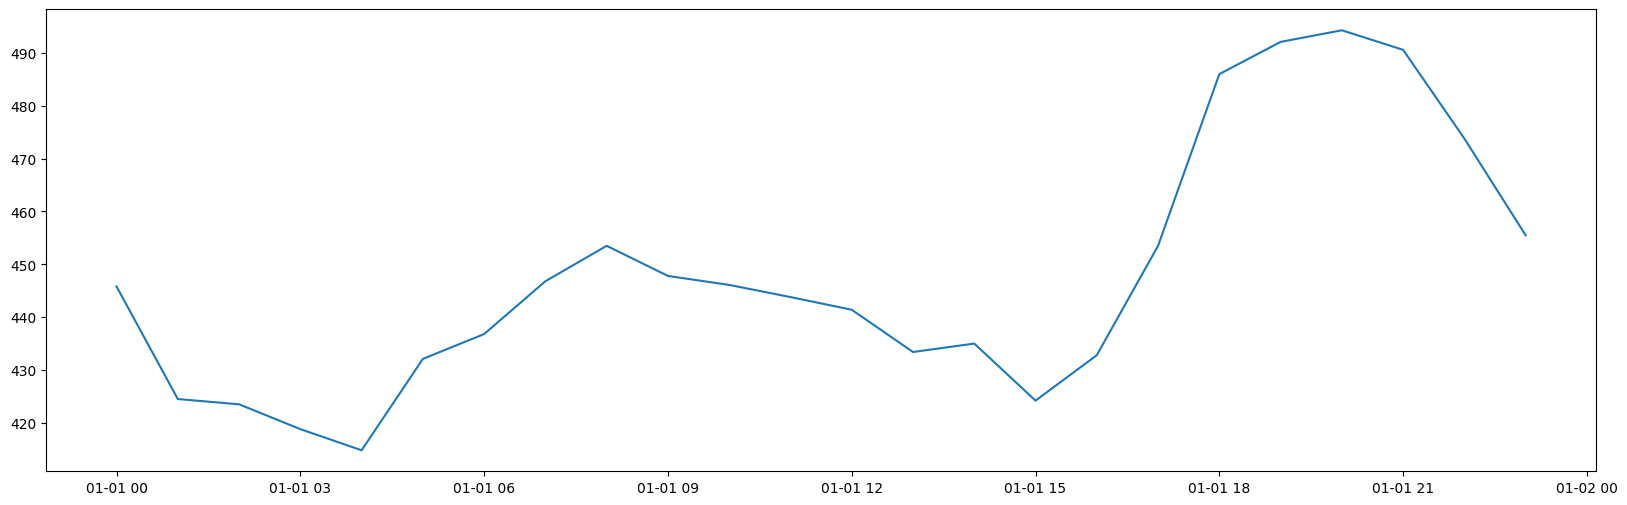

In [63]:

plt.figure(figsize=(20,6))
plt.plot(df_scatter_day['datetime'],df_scatter_day['Demand (MW)'])

In [64]:
df_demand_copy .head()

,Demand (MW),hour,day,month,year
datetime,,,,,
2020-01-01 00:00:00,445.8,0,1,1,2020
2020-01-01 01:00:00,424.5,1,1,1,2020
2020-01-01 02:00:00,423.5,2,1,1,2020
2020-01-01 03:00:00,418.8,3,1,1,2020
2020-01-01 04:00:00,414.8,4,1,1,2020


In [65]:
df_demand_copy_1=df_demand_copy.groupby(['year','month','day'])['Demand (MW)'].mean()


In [66]:
df_demand_copy_1

year  month  day
2020  1      1      447.787500
             2      523.025000
             3      518.770833
             4      506.100000
             5      491.412500
                       ...    
2023  2      17     556.016667
             18     484.712500
             19     415.495833
             20     457.445833
             21     474.950000
Name: Demand (MW), Length: 1148, dtype: float64

In [67]:
df_bar=df_demand_copy_1.unstack()

In [68]:
df_bar.head()

day                 1           2           3           4           5   \
year month                                                               
2020 1      447.787500  523.025000  518.770833  506.100000  491.412500   
     2      490.508333  465.941667  503.004167  512.895833  569.900000   
     3      458.858333  495.512500  504.187500  518.991667  520.033333   
     4      434.620833  428.937500  406.716667  369.062500  372.158333   
     5      406.712500  412.975000  419.495833  432.254167  419.383333   

day                 6           7           8           9           10  ...  \
year month                                                              ...   
2020 1      540.670833  551.441667  540.120833  532.958333  498.170833  ...   
     2      590.562500  584.541667  520.125000  502.266667  530.229167  ...   
     3      535.887500  489.516667  463.916667  504.412500  510.683333  ...   
     4      414.500000  450.870833  499.979167  407.387500  384.275000  ...   
     5      410.283333  408.462500  394.204167  370.091667  354.437500  ...   

day                 22          23          24          25          26  \
year month                                                               
2020 1      613.579167  574.391667  547.995833  527.962500  476.141667   
     2      514.887500  468.958333  524.366667  533.516667  568.808333   
     3      465.583333  466.833333  483.033333  474.358333  467.362500   
     4      502.775000  497.500000  474.608333  411.112500  378.420833   
     5      490.112500  502.145833  497.529167  546.654167  595.129167   

day                 27          28          29          30          31  
year month                                                              
2020 1      557.658333  579.887500  570.487500  565.875000  546.695833  
     2      565.233333  532.766667  495.454167         NaN         NaN  
     3      464.925000  454.433333  407.120833  431.670833  434.108333  
     4      420.112500  420.295833  419.887500  413.358333         NaN  
     5      525.104167  569.275000  528.854167  441.650000  426.950000  

[5 rows x 31 columns]

<Axes: xlabel='year,month'>

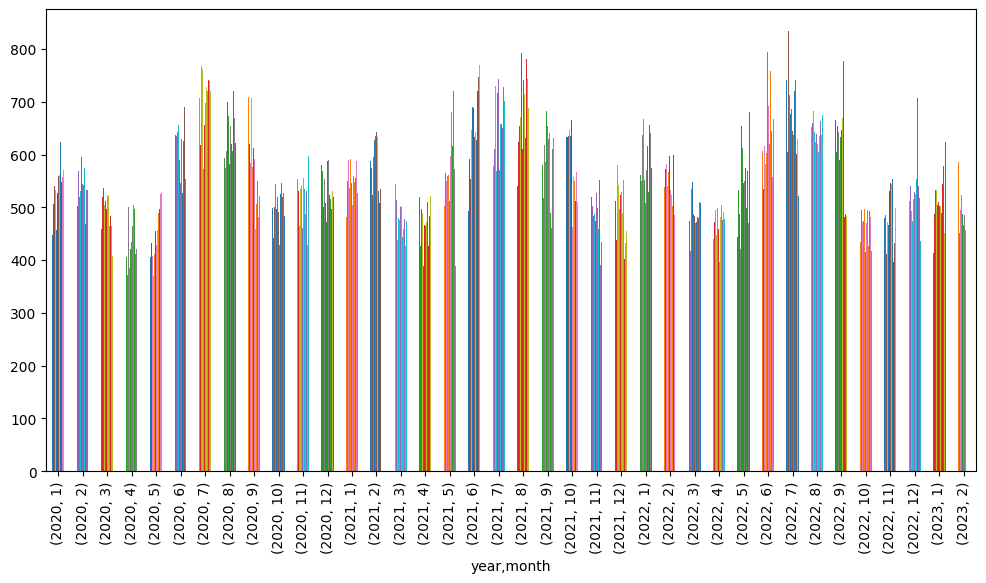

In [69]:
df_bar.plot.bar(figsize=(12,6),legend=False)

In [70]:
# df=df[:27552]

## **Data Visualization**

In [74]:
# Throughout a day consumption
df_day=df_demand_copy[:24]

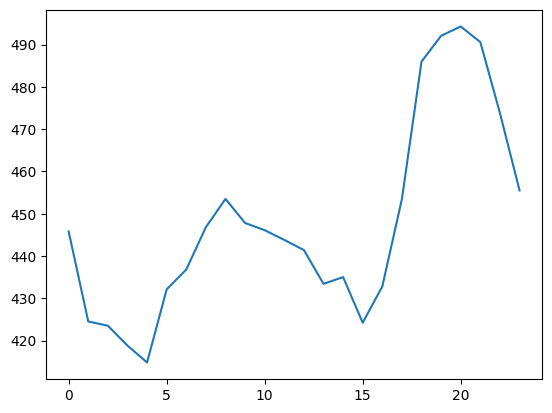

In [75]:
plt.plot(df_day['hour'],df_day['Demand (MW)'])

In [76]:
df_demand_month=df_demand_copy.groupby(['year','month','day'])['Demand (MW)'].mean()[:30].reset_index()


In [77]:
df_demand_month.head()

,year,month,day,Demand (MW)
0,2020,1,1,447.787500
1,2020,1,2,523.025000
2,2020,1,3,518.770833
3,2020,1,4,506.100000
4,2020,1,5,491.412500


In [78]:
df_demand_month.shape

(30, 4)

([<matplotlib.axis.XTick at 0x7c5398e11240>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30')])

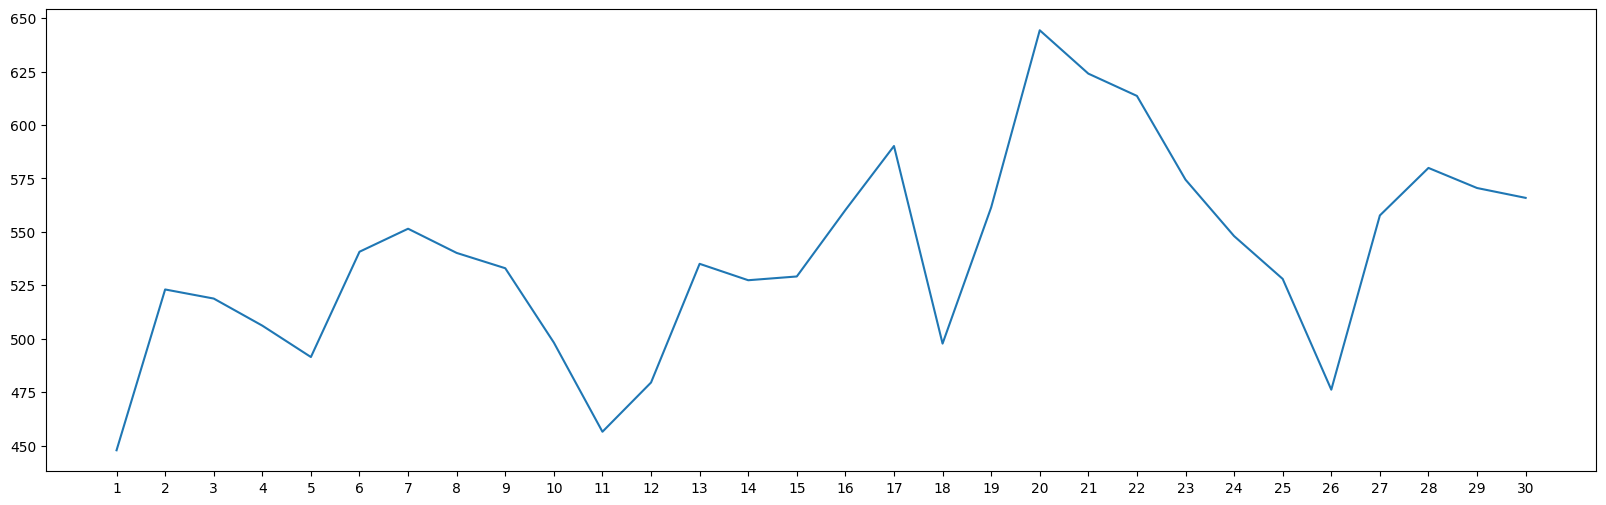

In [79]:
plt.figure(figsize=(20,6))
plt.plot(df_demand_month['day'],df_demand_month['Demand (MW)'])
plt.xticks(df_demand_month['day'])

In [80]:
df_demand_year=df_demand_copy.groupby(['year','month'])['Demand (MW)'].mean().reset_index()

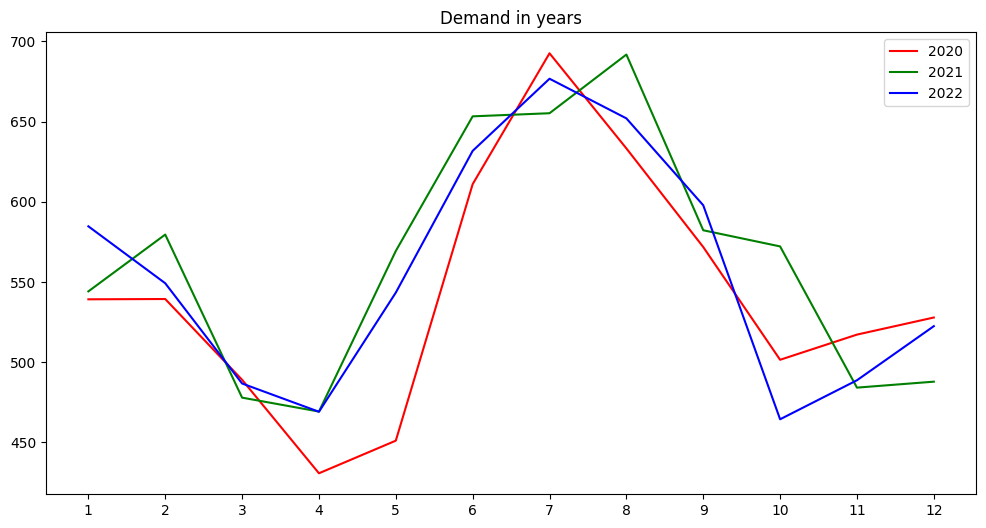

In [81]:
colors=['r','g','b']
demand_values=[df_demand_year.loc[:11]['Demand (MW)'],df_demand_year.loc[12:23]['Demand (MW)'],df_demand_year.loc[24:35]['Demand (MW)']]
labels = ['2020', '2021', '2022']
plt.figure(figsize=(12,6))

for i in range(3):
    x_values = np.arange(1, 13)
    plt.plot(x_values, demand_values[i], c=colors[i], label=labels[i])
plt.xticks(range(1,13))
plt.title('Demand in years')
plt.legend()

## **Data Cleaning**

In [82]:
df_weather_copy=df_weather.copy()

In [83]:
df_weather_copy.head()

,Name,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,snow,snowdepth,...,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions,Demand(MW)
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,Pokhara,38.0,34.4,29.0,69.76,0.0,0,NaN,0.0,0.0,...,4.7,220.0,1015.4,100.0,9.9,0.0,0,NaN,Overcast,445.8
2020-01-01 01:00:00,Pokhara,38.0,34.4,29.9,72.37,0.0,0,NaN,0.0,0.0,...,4.7,230.0,1015.3,100.0,9.9,0.0,0,NaN,Overcast,424.5
2020-01-01 02:00:00,Pokhara,38.0,35.7,30.8,75.06,0.0,0,NaN,0.0,0.0,...,3.4,230.0,1015.4,100.0,9.9,0.0,0,NaN,Overcast,423.5
2020-01-01 03:00:00,Pokhara,37.1,33.4,29.9,74.97,0.0,0,NaN,0.0,0.0,...,4.7,220.0,1015.3,88.9,9.9,0.0,0,NaN,Partially cloudy,418.8
2020-01-01 04:00:00,Pokhara,35.1,32.3,29.0,78.41,0.0,0,NaN,0.0,0.0,...,3.4,240.0,1015.2,0.0,9.9,0.0,0,NaN,Clear,414.8


In [84]:
df_weather_copy.isna().sum()

Name                    0
Temperature             0
feelslike               0
dewpoint                0
humidity                0
precipitation           0
precipprob              0
preciptype          24969
snow                   18
snowdepth              18
windgust            15497
windspeed               0
winddirection           0
sealevelpressure       18
cloudcover              0
visibility             18
solarradiation          0
uvindex                 0
severerisk          17766
conditions              0
Demand(MW)            168
dtype: int64

In [85]:
df_conditions=df_weather_copy[['conditions','windgust','sealevelpressure','visibility','severerisk','snow','snowdepth']]

In [86]:
df_conditions.head()

,conditions,windgust,sealevelpressure,visibility,severerisk,snow,snowdepth
datetime,,,,,,,
2020-01-01 00:00:00,Overcast,NaN,1015.4,9.9,NaN,0.0,0.0
2020-01-01 01:00:00,Overcast,NaN,1015.3,9.9,NaN,0.0,0.0
2020-01-01 02:00:00,Overcast,NaN,1015.4,9.9,NaN,0.0,0.0
2020-01-01 03:00:00,Partially cloudy,NaN,1015.3,9.9,NaN,0.0,0.0
2020-01-01 04:00:00,Clear,NaN,1015.2,9.9,NaN,0.0,0.0


In [87]:
df_conditions.sort_values('conditions',inplace=True)

<ipython-input-87-a415ae6bdeb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conditions.sort_values('conditions',inplace=True)


In [88]:
df_conditions.head()

,conditions,windgust,sealevelpressure,visibility,severerisk,snow,snowdepth
datetime,,,,,,,
2023-02-28 23:00:00,Clear,16.1,1007.7,9.9,10.0,0.0,0.0
2021-03-20 06:00:00,Clear,NaN,1032.3,9.9,NaN,0.0,0.0
2021-03-20 07:00:00,Clear,NaN,1032.5,9.9,NaN,0.0,0.0
2021-03-20 08:00:00,Clear,NaN,1033.1,9.9,NaN,0.0,0.0
2021-03-20 09:00:00,Clear,NaN,1033.2,9.9,NaN,0.0,0.0


In [89]:
df_melted=pd.melt(df_conditions,id_vars=['conditions'],value_vars=['windgust','sealevelpressure','visibility','severerisk','snow','snowdepth'])

In [90]:
df_melted

,conditions,variable,value
0,Clear,windgust,16.1
1,Clear,windgust,NaN
2,Clear,windgust,NaN
3,Clear,windgust,NaN
4,Clear,windgust,NaN
...,...,...,...
166315,"Snow, Rain, Overcast",snowdepth,0.0
166316,"Snow, Rain, Overcast",snowdepth,0.0
166317,"Snow, Rain, Partially cloudy",snowdepth,0.0
166318,"Snow, Rain, Partially cloudy",snowdepth,0.0


In [91]:
df_median=df_melted.groupby(['conditions','variable',])['value'].median()

In [92]:
df_median=df_median.reset_index()

In [93]:
df_median.head()

,conditions,variable,value
0,Clear,sealevelpressure,1018.8
1,Clear,severerisk,10.0
2,Clear,snow,0.0
3,Clear,snowdepth,0.0
4,Clear,visibility,9.9


In [94]:
df_weather.head()

,Name,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,snow,snowdepth,...,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions,Demand(MW)
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,Pokhara,38.0,34.4,29.0,69.76,0.0,0,NaN,0.0,0.0,...,4.7,220.0,1015.4,100.0,9.9,0.0,0,NaN,Overcast,445.8
2020-01-01 01:00:00,Pokhara,38.0,34.4,29.9,72.37,0.0,0,NaN,0.0,0.0,...,4.7,230.0,1015.3,100.0,9.9,0.0,0,NaN,Overcast,424.5
2020-01-01 02:00:00,Pokhara,38.0,35.7,30.8,75.06,0.0,0,NaN,0.0,0.0,...,3.4,230.0,1015.4,100.0,9.9,0.0,0,NaN,Overcast,423.5
2020-01-01 03:00:00,Pokhara,37.1,33.4,29.9,74.97,0.0,0,NaN,0.0,0.0,...,4.7,220.0,1015.3,88.9,9.9,0.0,0,NaN,Partially cloudy,418.8
2020-01-01 04:00:00,Pokhara,35.1,32.3,29.0,78.41,0.0,0,NaN,0.0,0.0,...,3.4,240.0,1015.2,0.0,9.9,0.0,0,NaN,Clear,414.8


In [95]:
df_main=df_weather.copy()

In [96]:
df_main

,Name,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,snow,snowdepth,...,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions,Demand(MW)
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,Pokhara,38.0,34.4,29.0,69.76,0.0,0,NaN,0.0,0.0,...,4.7,220.0,1015.4,100.0,9.9,0.0,0,NaN,Overcast,445.8
2020-01-01 01:00:00,Pokhara,38.0,34.4,29.9,72.37,0.0,0,NaN,0.0,0.0,...,4.7,230.0,1015.3,100.0,9.9,0.0,0,NaN,Overcast,424.5
2020-01-01 02:00:00,Pokhara,38.0,35.7,30.8,75.06,0.0,0,NaN,0.0,0.0,...,3.4,230.0,1015.4,100.0,9.9,0.0,0,NaN,Overcast,423.5
2020-01-01 03:00:00,Pokhara,37.1,33.4,29.9,74.97,0.0,0,NaN,0.0,0.0,...,4.7,220.0,1015.3,88.9,9.9,0.0,0,NaN,Partially cloudy,418.8
2020-01-01 04:00:00,Pokhara,35.1,32.3,29.0,78.41,0.0,0,NaN,0.0,0.0,...,3.4,240.0,1015.2,0.0,9.9,0.0,0,NaN,Clear,414.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28 19:00:00,Pokhara,56.0,56.0,39.8,54.45,0.0,0,NaN,0.0,0.0,...,0.0,0.0,1008.6,0.0,9.9,0.0,0,10.0,Clear,NaN
2023-02-28 20:00:00,Pokhara,52.1,52.1,41.0,65.83,0.0,0,NaN,0.0,0.0,...,3.4,70.0,1008.3,0.0,9.9,0.0,0,10.0,Clear,NaN
2023-02-28 21:00:00,Pokhara,53.1,53.1,41.0,63.45,0.0,0,NaN,0.0,0.0,...,3.4,70.0,1008.4,0.0,9.9,0.0,0,10.0,Clear,NaN


In [97]:
columns_to_fill=['sealevelpressure','severerisk','snow','snowdepth','visibility','windgust']
constraint=['Clear','Freezing Drizzle/Freezing Rain, Ice, Overcast','Freezing Drizzle/Freezing Rain, Overcast','Ice, Overcast','Overcast','Partially cloudy','Rain','Rain, Overcast','Rain, Partially cloudy','Snow, Freezing Drizzle/Freezing Rain, Ice, Overcast','Snow, Overcast','Snow, Partially cloudy','Snow, Rain, Overcast','Snow, Rain, Partially cloudy']

In [98]:
shape=df_main.shape[0]
for i in range(len(constraint)):
  for j in range(len(columns_to_fill)):
    value=df_median[df_median['conditions']==constraint[i]][df_median['variable']==columns_to_fill[j]]['value']
    boolv=df_main[columns_to_fill[j]].isna()
    for k in range(shape):
        if boolv[k] and df_main.conditions[k]==constraint[i]:
          df_main[columns_to_fill[j]][k]=value

<ipython-input-98-70f214201c41>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  value=df_median[df_median['conditions']==constraint[i]][df_median['variable']==columns_to_fill[j]]['value']
<ipython-input-98-70f214201c41>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main[columns_to_fill[j]][k]=value


In [99]:
df_main.head()

,Name,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,snow,snowdepth,...,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions,Demand(MW)
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,Pokhara,38.0,34.4,29.0,69.76,0.0,0,NaN,0.0,0.0,...,4.7,220.0,1015.4,100.0,9.9,0.0,0,10.0,Overcast,445.8
2020-01-01 01:00:00,Pokhara,38.0,34.4,29.9,72.37,0.0,0,NaN,0.0,0.0,...,4.7,230.0,1015.3,100.0,9.9,0.0,0,10.0,Overcast,424.5
2020-01-01 02:00:00,Pokhara,38.0,35.7,30.8,75.06,0.0,0,NaN,0.0,0.0,...,3.4,230.0,1015.4,100.0,9.9,0.0,0,10.0,Overcast,423.5
2020-01-01 03:00:00,Pokhara,37.1,33.4,29.9,74.97,0.0,0,NaN,0.0,0.0,...,4.7,220.0,1015.3,88.9,9.9,0.0,0,10.0,Partially cloudy,418.8
2020-01-01 04:00:00,Pokhara,35.1,32.3,29.0,78.41,0.0,0,NaN,0.0,0.0,...,3.4,240.0,1015.2,0.0,9.9,0.0,0,10.0,Clear,414.8


In [100]:
# This will turn all of the string value into category values
for label, content in df_main.items():
    if pd.api.types.is_string_dtype(content):
        df_main[label] = content.astype("category").cat.as_ordered()

In [101]:
# Turn categorical variables into numbers and fill missing
for label, content in df_main.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1
        df_main[label] = pd.Categorical(content).codes+1

In [102]:
df_main.head()

,Name,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,snow,snowdepth,...,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions,Demand(MW)
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1,38.0,34.4,29.0,69.76,0.0,0,0,0.0,0.0,...,4.7,220.0,1015.4,100.0,9.9,0.0,0,10.0,5,445.8
2020-01-01 01:00:00,1,38.0,34.4,29.9,72.37,0.0,0,0,0.0,0.0,...,4.7,230.0,1015.3,100.0,9.9,0.0,0,10.0,5,424.5
2020-01-01 02:00:00,1,38.0,35.7,30.8,75.06,0.0,0,0,0.0,0.0,...,3.4,230.0,1015.4,100.0,9.9,0.0,0,10.0,5,423.5
2020-01-01 03:00:00,1,37.1,33.4,29.9,74.97,0.0,0,0,0.0,0.0,...,4.7,220.0,1015.3,88.9,9.9,0.0,0,10.0,6,418.8
2020-01-01 04:00:00,1,35.1,32.3,29.0,78.41,0.0,0,0,0.0,0.0,...,3.4,240.0,1015.2,0.0,9.9,0.0,0,10.0,1,414.8


In [103]:
df_main['hour']=df_main.index.hour
df_main['day']=df_main.index.day
df_main['month']=df_main.index.month
df_main['year']=df_main.index.year
df_main.reset_index(inplace=True)
df_main.drop("datetime",axis=1, inplace=True)



In [104]:
df_main.drop('Name',axis=1,inplace=True)

In [105]:
df_main.head()

,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,snow,snowdepth,windgust,...,visibility,solarradiation,uvindex,severerisk,conditions,Demand(MW),hour,day,month,year
0,38.0,34.4,29.0,69.76,0.0,0,0,0.0,0.0,18.3,...,9.9,0.0,0,10.0,5,445.8,0,1,1,2020
1,38.0,34.4,29.9,72.37,0.0,0,0,0.0,0.0,18.3,...,9.9,0.0,0,10.0,5,424.5,1,1,1,2020
2,38.0,35.7,30.8,75.06,0.0,0,0,0.0,0.0,18.3,...,9.9,0.0,0,10.0,5,423.5,2,1,1,2020
3,37.1,33.4,29.9,74.97,0.0,0,0,0.0,0.0,17.2,...,9.9,0.0,0,10.0,6,418.8,3,1,1,2020
4,35.1,32.3,29.0,78.41,0.0,0,0,0.0,0.0,11.4,...,9.9,0.0,0,10.0,1,414.8,4,1,1,2020


#### Correlation Visualization

In [106]:
correlations=[]
column_names=[]
for column_name in df_main.columns:
  if (column_name!='Demand(MW)') :
    correlation = df_main[column_name].corr(df_main['Demand(MW)'])
    correlations.append(correlation)
    column_names.append(column_name)
    print(f'{column_name}:{correlation}\n')

Temperature:0.4482026094848794

feelslike:0.43700612151670437

dewpoint:0.3630003358919943

humidity:-0.18714220450379918

precipitation:-0.01142329864780172

precipprob:-0.05924023804201778

preciptype:-0.05567728155962248

snow:0.015329021963442883

snowdepth:0.05360476522279904

windgust:-0.05255812948138975

windspeed:0.048701265257617685

winddirection:0.04399149005191477

sealevelpressure:-0.036960251500342045

cloudcover:-0.074163547281688

visibility:0.08782238415954012

solarradiation:0.3111178745032704

uvindex:0.3090206716592928

severerisk:0.29021220523505237

conditions:0.02228971386163341

hour:0.36001174609391307

day:0.009925870126880988

month:0.05390937236613773

year:0.0021404837369242277



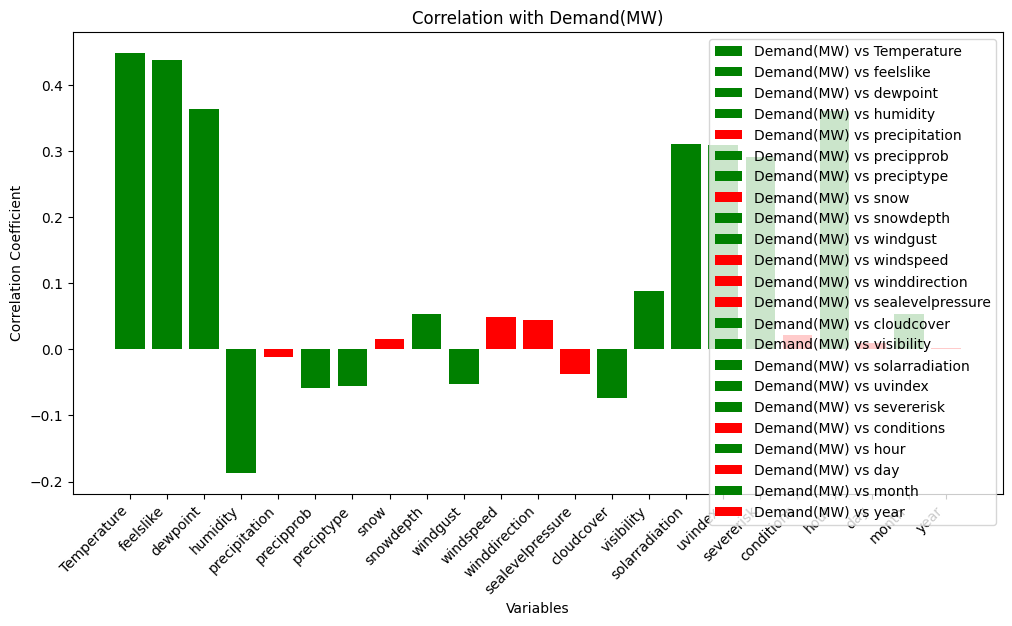

In [107]:
bar_colors = ['g' if  0.05< abs(correlation) else 'r' for correlation in correlations]

# Plot the bar chart with color coding
plt.figure(figsize=(12, 6))
bars = plt.bar(column_names, correlations, color=bar_colors)
plt.title('Correlation with Demand(MW)')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')

# Add legend and change its position
plt.legend(bars, [f'Demand(MW) vs {column}' for column in column_names], loc='upper right')

plt.show()

In [108]:
columns_to_drop=['precipitation','snow','sealevelpressure','winddirection','windspeed','cloudcover','conditions']


In [109]:
df_main.drop(columns=columns_to_drop,axis=1,inplace=True)

In [110]:
df_main.head()

,Temperature,feelslike,dewpoint,humidity,precipprob,preciptype,snowdepth,windgust,visibility,solarradiation,uvindex,severerisk,Demand(MW),hour,day,month,year
0,38.0,34.4,29.0,69.76,0,0,0.0,18.3,9.9,0.0,0,10.0,445.8,0,1,1,2020
1,38.0,34.4,29.9,72.37,0,0,0.0,18.3,9.9,0.0,0,10.0,424.5,1,1,1,2020
2,38.0,35.7,30.8,75.06,0,0,0.0,18.3,9.9,0.0,0,10.0,423.5,2,1,1,2020
3,37.1,33.4,29.9,74.97,0,0,0.0,17.2,9.9,0.0,0,10.0,418.8,3,1,1,2020
4,35.1,32.3,29.0,78.41,0,0,0.0,11.4,9.9,0.0,0,10.0,414.8,4,1,1,2020


## Splitting the data into valid/train sets

In [147]:
df_main.head()

,Temperature,feelslike,dewpoint,humidity,precipprob,preciptype,snowdepth,windgust,visibility,solarradiation,uvindex,severerisk,Demand(MW),hour,day,month,year
0,38.0,34.4,29.0,69.76,0,0,0.0,18.3,9.9,0.0,0,10.0,445.8,0,1,1,2020
1,38.0,34.4,29.9,72.37,0,0,0.0,18.3,9.9,0.0,0,10.0,424.5,1,1,1,2020
2,38.0,35.7,30.8,75.06,0,0,0.0,18.3,9.9,0.0,0,10.0,423.5,2,1,1,2020
3,37.1,33.4,29.9,74.97,0,0,0.0,17.2,9.9,0.0,0,10.0,418.8,3,1,1,2020
4,35.1,32.3,29.0,78.41,0,0,0.0,11.4,9.9,0.0,0,10.0,414.8,4,1,1,2020


Comment

In [112]:
df_main_train=df_main[:27552]

In [113]:
# Step 1: Split into training and temporary set (70% training, 30% temporary set)
train_data, temp_set = train_test_split(df_main_train, test_size=0.3, random_state=42)

# Step 2: Split the temporary set into validation and test sets (20% for test)
valid_data, test_data = train_test_split(temp_set, test_size=0.2, random_state=42)


In [114]:
train_data.shape, valid_data.shape, test_data.shape

((19286, 17), (6612, 17), (1654, 17))

#### Now we have training data and validation data. So we can create x_train & x_valid as input features and y_train & y_valid as output labels

In [115]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [116]:
x_train,y_train=train_data.drop("Demand(MW)",axis=1),train_data['Demand(MW)']
x_valid,y_valid=valid_data.drop("Demand(MW)",axis=1),valid_data['Demand(MW)']
x_test,y_test=test_data.drop("Demand(MW)",axis=1),test_data['Demand(MW)']

In [117]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((19286, 16), (19286,), (6612, 16), (6612,))

## Setting Evaluation Metrics

In [118]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score,mean_squared_error

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds),
              }
    return scores

## Training XGBRegressor Model

In [119]:
model = XGBRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [120]:
%%time

model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:03:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_samples" } are not used.

  warnings.warn(smsg, UserWarning)


CPU times: user 2.22 s, sys: 41 ms, total: 2.26 s
Wall time: 2.03 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             max_samples=10000, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=-1, num_parallel_tree=None, ...)

In [121]:
show_scores(model)

{'Training MAE': 18.531434596693764,
 'Valid MAE': 24.120231263794757,
 'Training RMSLE': 0.04555372394758377,
 'Valid RMSLE': 0.05773905048337495,
 'Training R^2': 0.954670916710022,
 'Valid R^2': 0.9221914076696036}

In [122]:
x_test

,Temperature,feelslike,dewpoint,humidity,precipprob,preciptype,snowdepth,windgust,visibility,solarradiation,uvindex,severerisk,hour,day,month,year
25393,35.1,35.1,29.9,81.34,0,0,0.00,7.8,9.9,0.0,0,10.0,1,24,11,2022
16853,38.9,35.5,37.1,93.19,0,0,0.00,11.4,9.9,0.0,0,10.0,5,3,12,2021
7923,50.0,46.7,43.1,77.01,0,0,0.00,18.3,9.9,0.0,0,10.0,3,26,11,2020
12560,74.9,74.9,68.0,79.04,0,0,0.00,17.2,9.9,384.0,4,10.0,9,7,6,2021
8013,45.0,38.2,30.8,57.42,0,0,0.00,21.9,9.9,0.0,0,10.0,21,29,11,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,44.1,44.1,41.0,88.85,0,0,0.00,11.4,6.8,0.0,0,10.0,2,20,4,2020
22555,72.0,72.0,71.1,97.00,0,5,0.00,7.8,9.9,20.0,0,10.0,20,28,7,2022
9999,36.0,28.5,16.1,43.85,0,0,4.13,11.4,9.9,536.0,5,10.0,15,20,2,2021
4844,74.0,74.0,69.2,84.82,0,0,0.00,11.4,9.9,0.0,0,10.0,21,20,7,2020


In [123]:

list=model.predict(x_test)

In [124]:
list

array([407.81906, 454.16092, 397.64667, ..., 527.79205, 714.44366,
       556.46   ], dtype=float32)

In [125]:
y_test

25393    412.1
16853    445.3
7923     409.1
12560    619.0
8013     520.3
         ...  
2641     443.1
22555    692.5
9999     518.1
4844     678.6
25557    592.7
Name: Demand(MW), Length: 1654, dtype: float64

## Hyerparameter tuning with RandomizedSearchCV

In [126]:
%%time

# Different RandomForestRegressor hyperparameters
# buiding parameter grid
param_grid = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': [0, 1e-5, 1e-2, 0.1, 1, 100],
    'reg_lambda': [0, 1e-5, 1e-2, 0.1, 1, 100]
}


CPU times: user 6.05 ms, sys: 0 ns, total: 6.05 ms
Wall time: 7.21 ms


In [127]:
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    n_iter=25,  # Number of random combinations to try
    scoring='neg_mean_absolute_error',  # Use the appropriate metric for your task
    cv=5,  # Number of cross-validation folds
    random_state=42,
    n_jobs=-1  # Use all available processors
)

In [128]:
# Perform the RandomizedSearchCV
random_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:04:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_samples" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c539739ce80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c539727ceb0>,
                                        'reg_alpha': [0, 1e-05, 0.01, 0.1, 1,
                                                      100],
                                        'reg_lambda': [0, 1e-05, 0.01, 0.1, 1,
                                                       100],
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c5398e4a4a0>},
                   random_state=42, scoring='neg_mean_absolute_error')

In [130]:
# Get the best parameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [131]:
# Print the best parameters
print("Best Parameters:")
print(best_params)


Best Parameters:
{'colsample_bytree': 0.9272059063689972, 'learning_rate': 0.268219174976903, 'max_depth': 9, 'n_estimators': 186, 'reg_alpha': 100, 'reg_lambda': 1, 'subsample': 0.8769744131561081}


In [132]:
#Access the best model and use it for predictions
predictions = best_model.predict(x_test)

In [133]:
show_scores(best_model)

{'Training MAE': 6.576375705395003,
 'Valid MAE': 18.450536827830497,
 'Training RMSLE': 0.016507399319053997,
 'Valid RMSLE': 0.04545080757740133,
 'Training R^2': 0.994153043042611,
 'Valid R^2': 0.9500110748615288}

## Generating Output for the Next 7 days on Hourly Basis

In [194]:
# Importing Input feature data
input_features_for_demand=df_main[27552:] # Only last Seven Days

In [195]:
input_features_for_demand

,Temperature,feelslike,dewpoint,humidity,precipprob,preciptype,snowdepth,windgust,visibility,solarradiation,uvindex,severerisk,Demand(MW),hour,day,month,year
27552,55.1,55.1,32.0,41.25,0,0,0.0,19.5,9.9,0.0,0,10.0,NaN,0,22,2,2023
27553,56.9,56.9,35.1,43.72,0,0,0.0,19.5,9.9,0.0,0,10.0,NaN,1,22,2,2023
27554,56.9,56.9,38.0,49.13,0,0,0.0,19.5,9.9,0.0,0,10.0,NaN,2,22,2,2023
27555,57.8,57.8,41.0,53.38,0,0,0.0,18.3,9.9,0.0,0,10.0,NaN,3,22,2,2023
27556,57.8,57.8,46.1,64.98,0,0,0.0,21.9,9.9,0.0,0,10.0,NaN,4,22,2,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27715,56.0,56.0,39.8,54.45,0,0,0.0,11.4,9.9,0.0,0,10.0,NaN,19,28,2,2023
27716,52.1,52.1,41.0,65.83,0,0,0.0,15.0,9.9,0.0,0,10.0,NaN,20,28,2,2023
27717,53.1,53.1,41.0,63.45,0,0,0.0,17.2,9.9,0.0,0,10.0,NaN,21,28,2,2023
27718,55.1,55.1,41.0,58.85,0,0,0.0,17.2,9.9,0.0,0,10.0,NaN,22,28,2,2023


In [166]:
input_features_for_demand.drop("Demand(MW)",axis=1,inplace=True)

<ipython-input-166-3f9e75a7558a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_features_for_demand.drop("Demand(MW)",axis=1,inplace=True)


In [167]:
input_features_for_demand

,Temperature,feelslike,dewpoint,humidity,precipprob,preciptype,snowdepth,windgust,visibility,solarradiation,uvindex,severerisk,hour,day,month,year
27552,55.1,55.1,32.0,41.25,0,0,0.0,19.5,9.9,0.0,0,10.0,0,22,2,2023
27553,56.9,56.9,35.1,43.72,0,0,0.0,19.5,9.9,0.0,0,10.0,1,22,2,2023
27554,56.9,56.9,38.0,49.13,0,0,0.0,19.5,9.9,0.0,0,10.0,2,22,2,2023
27555,57.8,57.8,41.0,53.38,0,0,0.0,18.3,9.9,0.0,0,10.0,3,22,2,2023
27556,57.8,57.8,46.1,64.98,0,0,0.0,21.9,9.9,0.0,0,10.0,4,22,2,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27715,56.0,56.0,39.8,54.45,0,0,0.0,11.4,9.9,0.0,0,10.0,19,28,2,2023
27716,52.1,52.1,41.0,65.83,0,0,0.0,15.0,9.9,0.0,0,10.0,20,28,2,2023
27717,53.1,53.1,41.0,63.45,0,0,0.0,17.2,9.9,0.0,0,10.0,21,28,2,2023
27718,55.1,55.1,41.0,58.85,0,0,0.0,17.2,9.9,0.0,0,10.0,22,28,2,2023


In [183]:
output_demands=model.predict(input_features_for_demand)

In [184]:
output_datetime=df_weather[27552:].index

In [185]:
output_datetime

DatetimeIndex(['2023-02-22 00:00:00', '2023-02-22 01:00:00',
               '2023-02-22 02:00:00', '2023-02-22 03:00:00',
               '2023-02-22 04:00:00', '2023-02-22 05:00:00',
               '2023-02-22 06:00:00', '2023-02-22 07:00:00',
               '2023-02-22 08:00:00', '2023-02-22 09:00:00',
               ...
               '2023-02-28 14:00:00', '2023-02-28 15:00:00',
               '2023-02-28 16:00:00', '2023-02-28 17:00:00',
               '2023-02-28 18:00:00', '2023-02-28 19:00:00',
               '2023-02-28 20:00:00', '2023-02-28 21:00:00',
               '2023-02-28 22:00:00', '2023-02-28 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=168, freq=None)

In [188]:
final_output = pd.DataFrame({'datetime': output_datetime, 'Demands(MW)': output_demands})

In [196]:
final_output.to_csv("final_output.csv")

In [201]:
final_output.head

<bound method NDFrame.head of                datetime  Demands(MW)
0   2023-02-22 00:00:00   424.097748
1   2023-02-22 01:00:00   391.307159
2   2023-02-22 02:00:00   405.702972
3   2023-02-22 03:00:00   404.248077
4   2023-02-22 04:00:00   412.631561
..                  ...          ...
163 2023-02-28 19:00:00   463.043121
164 2023-02-28 20:00:00   466.504517
165 2023-02-28 21:00:00   455.367828
166 2023-02-28 22:00:00   435.356842
167 2023-02-28 23:00:00   417.693817

[168 rows x 2 columns]>

In [203]:
final_output['hour']=final_output.datetime.dt.hour

In [204]:
final_output

,datetime,Demands(MW),hour
0,2023-02-22 00:00:00,424.097748,0
1,2023-02-22 01:00:00,391.307159,1
2,2023-02-22 02:00:00,405.702972,2
3,2023-02-22 03:00:00,404.248077,3
4,2023-02-22 04:00:00,412.631561,4
...,...,...,...
163,2023-02-28 19:00:00,463.043121,19
164,2023-02-28 20:00:00,466.504517,20
165,2023-02-28 21:00:00,455.367828,21
166,2023-02-28 22:00:00,435.356842,22


#### Observing our final output, we can see that it follows the same trend that we saw in our training set. The demand starts to increase rapidly around 9 am and decreases before it ascends to peek at around 9 pm

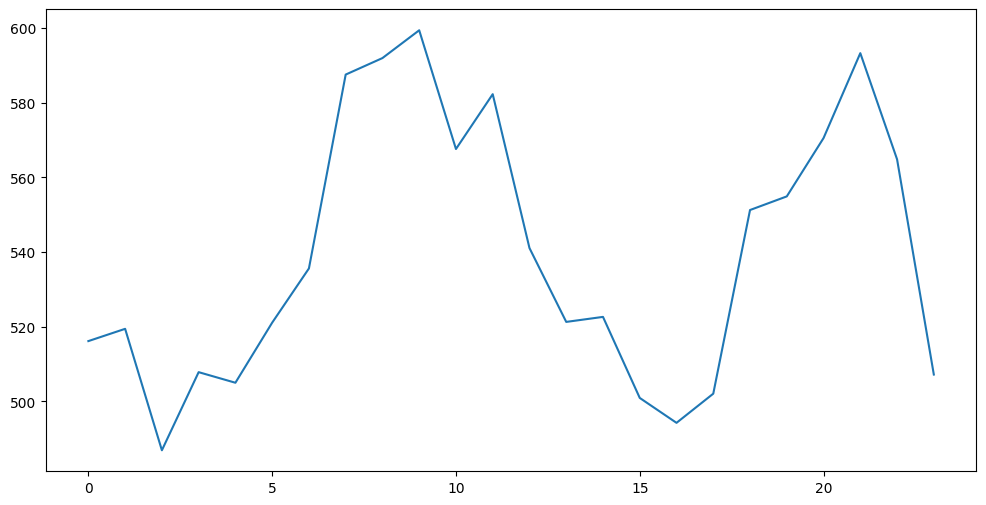

In [211]:
plt.figure(figsize=(12,6))
plt.plot(final_output['hour'][48:72],final_output['Demands(MW)'][48:72])


## Feature Importance

Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (Demand(MW)).

In [ ]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))

    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

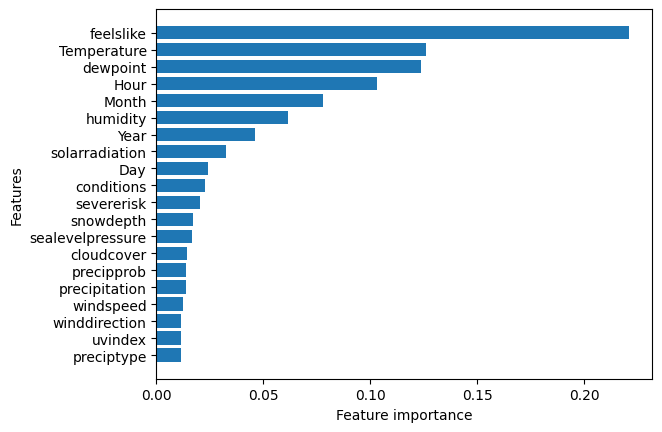

In [ ]:
plot_features(x_train.columns, best_model.feature_importances_)

**Note**: Feature importances can be used for feature selection, aiding in the identification of relevant features. Eliminating less important features can simplify the model, reduce overfitting and improve generalization. If certain features are found to be highly important, it can guide future data collection efforts on such features (like temperature in this case) to be more detailed or accurate so that it can improve model performance.

## A Robust Function
In a more practical scenario, it might be the case that we may not be provided with the prediction set as it was. It will be necessary to deal with missing values, outliers or encode categorical values. We built a function to address such real life unprocessed data.

In [ ]:
# Creating a function that can preprocess any kind of data
def processdata(data):
  data.drop("Name",axis=1,inplace=True)
  data.drop("Demand(MW)",axis=1,inplace=True)
  data['datetime']=pd.to_datetime(data['datetime'])
  data["Year"] = data.datetime.dt.year
  data["Month"] = data.datetime.dt.month
  data["Day"] = data.datetime.dt.day
  data["Hour"] = data.datetime.dt.hour
  data.drop("datetime",axis=1,inplace=True)

  # This will turn all of the string value into category values
  for label, content in data.items():
      if pd.api.types.is_string_dtype(content):
          data[label] = content.astype("category").cat.as_ordered(as_ordered=True)

  # Turn categorical variables into numbers and fill missing
  for label, content in df_main.items():
      if not pd.api.types.is_numeric_dtype(content):
          # Turn categories into numbers and add +1
          df_main[label] = pd.Categorical(content).codes+1
  return data